# Martin Varbanov Num: 165
# NLP Project

### dependancies:

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

## import data

In [68]:
import pandas as pd

pink = pd.read_csv("pink.csv")
yes = pd.read_csv("yes.csv")
tool = pd.read_csv("tool.csv")
zappa = pd.read_csv("zappa.csv")

### Show some basic info

In [69]:
pink.head()

band                                             lyrics  \
0  pink floyd  Mother, do you think they'll drop the bomb? \n...   
1  pink floyd  Breathe, breathe in the air \nDon't be afraid ...   
2  pink floyd  Hey you! \nOut there in the cold, getting lone...   
3  pink floyd  Hello \nIs there anybody in there? \nJust nod ...   
4  pink floyd  So, so you think you can tell \nHeaven from He...   

                                   song  
0              Pink Floyd Mother lyrics  
1             Pink Floyd Breathe lyrics  
2             Pink Floyd Hey You lyrics  
3    Pink Floyd Comfortably Numb lyrics  
4  Pink Floyd Wish You Were Here lyrics

### remove unneccesary cols 

In [70]:
del pink["song"]
del yes["song"]
del tool["song"]
del zappa["song"]

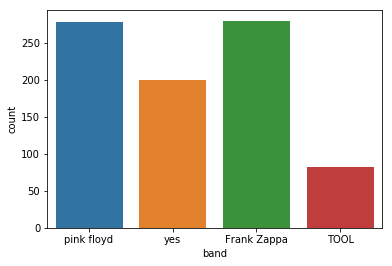

In [71]:
full_data = [pink, yes, zappa, tool]
df = pd.concat(full_data)
sns.countplot(data=df, x='band');

### Lets remove Tool, as it doesn't have much of a data

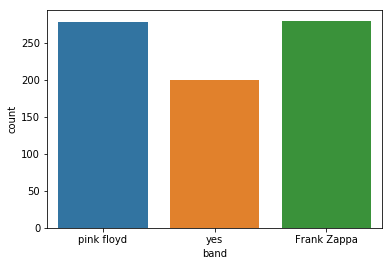

In [72]:
full_data = [pink, yes, zappa]
df = pd.concat(full_data)
sns.countplot(data=df, x='band');

### That looks better 

## Lets make some visualizations and basic data things 

In [73]:
all_words = df['lyrics'].str.split(expand=True).unstack().value_counts()

### Amount of words:

In [74]:
all_words.shape

(16295,)

### Top words:

In [75]:
all_words.head(15)

the     5833
you     2824
to      2700
a       2559
I       2514
of      1914
in      1646
and     1623
it      1110
And     1108
me      1054
on      1042
your     946
all      917
is       890
dtype: int64

### Lowest words:
    - Interesting how " (you " was recognized as a word

In [76]:
all_words.tail(15)

innocent...    1
freaklng       1
freaky         1
yeaah?!        1
sucks          1
fake-up        1
kingdom        1
sparrow        1
late?          1
part!          1
newsmen        1
loud.          1
cries.         1
taunting       1
echo           1
dtype: int64

## Lets check this data for each of the bands: 

In [77]:
pink_all_words = pink['lyrics'].str.split(expand=True).unstack().value_counts()
yes_all_words = yes['lyrics'].str.split(expand=True).unstack().value_counts()
zappa_all_words = zappa['lyrics'].str.split(expand=True).unstack().value_counts()

In [78]:
print(pink_all_words.shape)
print(yes_all_words.shape)
print(zappa_all_words.shape)

(4280,)
(4773,)
(11434,)


([<matplotlib.patches.Wedge at 0x7f071ed0cf60>,
 [Text(0.871468,0.671226,''),
  Text(-0.50186,0.978844,''),
  Text(-0.1997,-1.08172,'')])

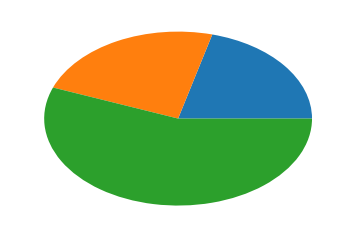

In [79]:
plt.pie([pink_all_words.shape[0], yes_all_words.shape[0], zappa_all_words.shape[0]])

In [80]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

def plot_wordcloud_mask(words, img_path):
    img = Image.open(img_path)
    img_mask = np.array(img)

    plt.figure(figsize=(12,8))
    wc = WordCloud(background_color="black", max_words=10000, mask=img_mask,
                   stopwords=STOPWORDS, max_font_size= 40)
    wc.generate(" ".join(words))
    plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.axis('off');

### We have to check the NAN rows

In [81]:
print(pink["lyrics"].isnull().sum())
print(yes["lyrics"].isnull().sum())
print(zappa["lyrics"].isnull().sum())

78
29
69


In [82]:
pink.dropna(inplace=True)
yes.dropna(inplace=True)
zappa.dropna(inplace=True)
df.dropna(inplace=True)

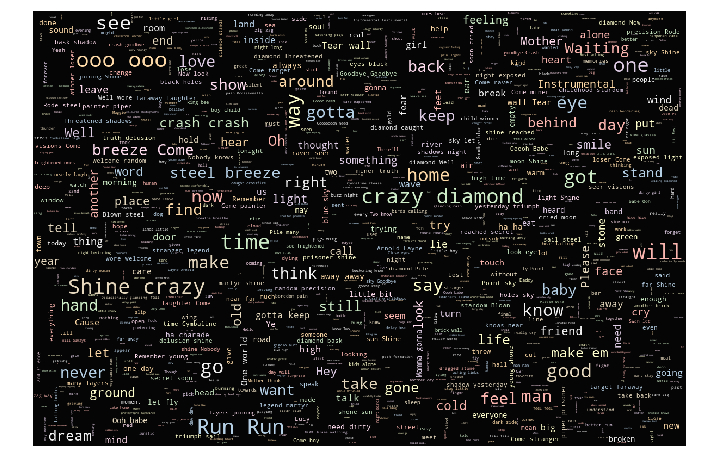

In [83]:
plot_wordcloud_mask(pink.lyrics.values, "pic/pink.png")

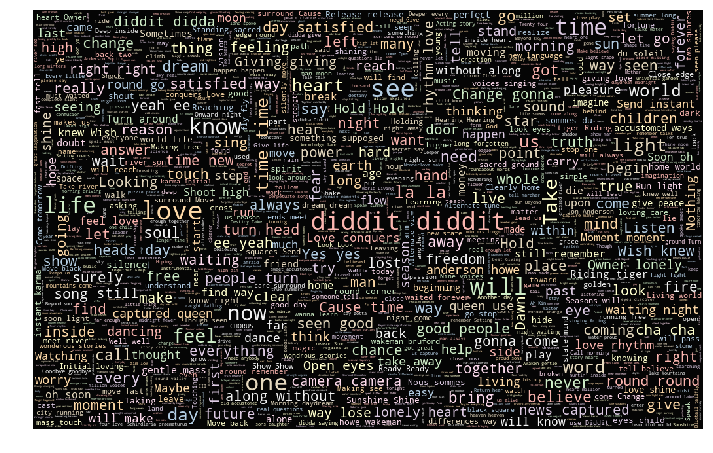

In [84]:
plot_wordcloud_mask(yes.lyrics.values, "pic/yes_wall.jpg")

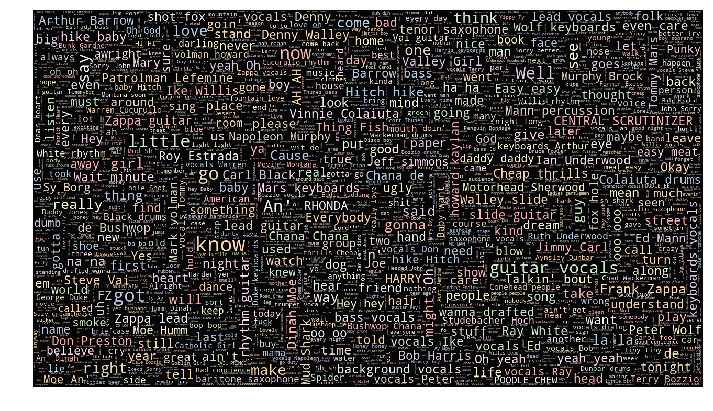

In [85]:
plot_wordcloud_mask(zappa.lyrics.values, "pic/zappa_wall.jpg")

### Should make significanse tests for common words like the, a, love, yes, got, now

#### word count 

In [86]:
sum = 0
for el in all_words:
    sum +=el
sum

134972

In [87]:
sum = 0
for el in pink_all_words:
    sum +=el
sum

24949

In [88]:
sum = 0
for el in yes_all_words:
    sum +=el
sum

45603

In [89]:
sum = 0
for el in zappa_all_words:
    sum +=el
sum

64420

#### Shuffle data:

In [90]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

band                                             lyrics
0   pink floyd  Scream thy last scream old woman with a casket...
1   pink floyd  Harmlessly passing your time in the grassland ...
2          yes  A beacon is shining \n'Cross the cosmos, it's ...
3  Frank Zappa  [includes a quote from Isn't It Romantic? (Rod...
4   pink floyd  One of these days \nI'm going to cut you into ...

In [91]:
df.tail()

band                                             lyrics
577         yes  (Anderson) Why is there you when there are few...
578  pink floyd  As I reach for a peach \nSlide a rind down beh...
579         yes  No need to wonder "do you belong?" \nNo need t...
580  pink floyd  Run, run, run, run, run, run, run, run \nRun, ...
581         yes  No need to wonder "do you belong?" \nNo need t...

In [92]:
df.describe()

band           lyrics
count           582              582
unique            3              523
top     Frank Zappa  [Instrumental] 
freq            211               10

#### Check if we have songs with no lyrics
        - we don't at first glance
        - There are a number of songs which have lyrics but lyric col contains a string value "(INSTRUMENTAL), instrumental, "Instrumental" or similar

In [93]:
df[df["lyrics"] == ""]

Empty DataFrame
Columns: [band, lyrics]
Index: []

## Facts about the bands we could use:
### Pink Floyd:
    - English band, making music between the late 60s-today. (Most of their is done during the 70s)
    - Very long songs, with very little to no lyrics
    - Use of very specific, uncommon words
    - We could recognize them with a model that recognizes small word counts, or maybe by some of the words that only they are using
### Yes
    - English band, making music between the late 60s-today. (Most of their is done during the 70s)
    - have very long songs with a lot of lyrics
    - They use a lot of words, a lot of unique ones, but common in general
    - We could try to have a model to catch their big amounts of words
### Frank Zappa
    - U.S. musician, being active between 1955– 1993
    - During his lifetime, Zappa released 62 albums. Since 1994, the Zappa Family Trust has released 49 posthumous albums, making a total of 111 albums.
    - We could make a cluster between English and American words and see if Zappa segregates from them 

#### Spliting data

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["lyrics"], df["band"], test_size=0.33, random_state=42)

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv_zappa = CountVectorizer()
cv_floyd = CountVectorizer()
cv_yes = CountVectorizer()
zappa_bag_of_words = cv_zappa.fit_transform(zappa["lyrics"]).todense()
pink_bag_of_words = cv_floyd.fit_transform(pink["lyrics"]).todense()
yes_bag_of_words = cv_yes.fit_transform(yes["lyrics"]).todense()

bag_words_list = {**cv_zappa.vocabulary_, **cv_floyd.vocabulary_, **cv_yes.vocabulary_,}
bag_words_list_pink_yes = {**cv_floyd.vocabulary_, **cv_yes.vocabulary_,}
bag_words_list_pink_zappa = {**cv_zappa.vocabulary_, **cv_floyd.vocabulary_,}
bag_words_list_zappa_yes = {**cv_zappa.vocabulary_, **cv_yes.vocabulary_,}


common_pink_words, unique_pink_words_, common_yes_words, unique_yes_words = dict(), dict(), dict(), dict() 
common_zappa_words, unique_zappa_words = {}, {}
# pink floyd words:
for key in cv_floyd.vocabulary_:
    if key in bag_words_list_zappa_yes:
        common_pink_words[key] = 1
    else:
        unique_pink_words_[key] = 1

# Yes words
for key in cv_yes.vocabulary_:
    if key in bag_words_list_pink_zappa:
        common_yes_words[key] = 1
    else:
        unique_yes_words[key] = 1
        
# Frank Zappa
for key in cv_zappa.vocabulary_:
    if key in bag_words_list_pink_yes:
        common_zappa_words[key] = 1
    else:
        unique_zappa_words[key] = 1

### Common words among the other bands
    - Very interesting, how all 3 groups have about 2000 words in common

In [96]:
print(len(common_zappa_words))
print(len(common_pink_words))
print(len(common_yes_words))

2126
1944
1800


([<matplotlib.patches.Wedge at 0x7f071ed31908>,
 [Text(0.461528,0.998495,'zappa'),
  Text(-1.09479,-0.106977,'yes'),
  Text(0.556445,-0.948877,'Pink Floyd')])

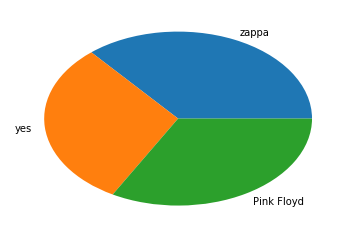

In [97]:
plt.pie([len(common_zappa_words), len(common_yes_words), len(common_pink_words)], labels=["zappa", "yes", "Pink Floyd"])

#### Uniqueness of the words:
    - Interesting enough Frank Zappa has the most data, also he is using more words, which the other 2 groups is not
    - If we take a quick look at the unique Zappa words, we could see, that his unique words are usually interjections or American specific words.

In [98]:
print(len(unique_zappa_words))
print(len(unique_pink_words_))
print(len(unique_yes_words))

4386
1038
1172


([<matplotlib.patches.Wedge at 0x7f071eaa3780>,
 [Text(-0.54485,0.955583,'zappa'),
  Text(0.0261934,-1.09969,'yes'),
  Text(0.968286,-0.521941,'Pink Floyd')])

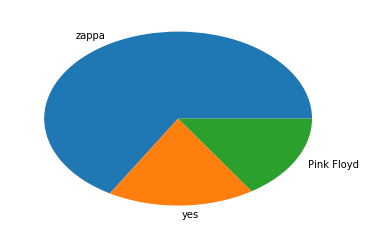

In [99]:
plt.pie([len(unique_zappa_words), len(unique_yes_words), len(unique_pink_words_)], labels=["zappa", "yes", "Pink Floyd"])

### Now we are going to make a baseline model
    - This way we'll check what's our starting point

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

In [101]:

pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', LinearSVC())
])

cross_val_score(pipeline, X_train, y_train, cv=3, n_jobs=3)

array([0.76335878, 0.70542636, 0.70542636])

In [102]:
pipeline.fit(X_train, y_train)
count_vectorizer = pipeline.steps[0][1]
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [103]:
list(count_vectorizer.vocabulary_.items())[:15]

[('confuse', 1284),
 ('intentions', 3295),
 ('disc', 1774),
 ('pay', 4592),
 ('tatters', 6399),
 ('snorks', 5890),
 ('void', 6981),
 ('grains', 2773),
 ('shape', 5648),
 ('landscape', 3557),
 ('how', 3129),
 ('yells', 7322),
 ('certify', 995),
 ('continues', 1326),
 ('later', 3576)]

In [104]:
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
from sklearn.model_selection import cross_val_predict
prediction = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=3)

0.7249357326478149


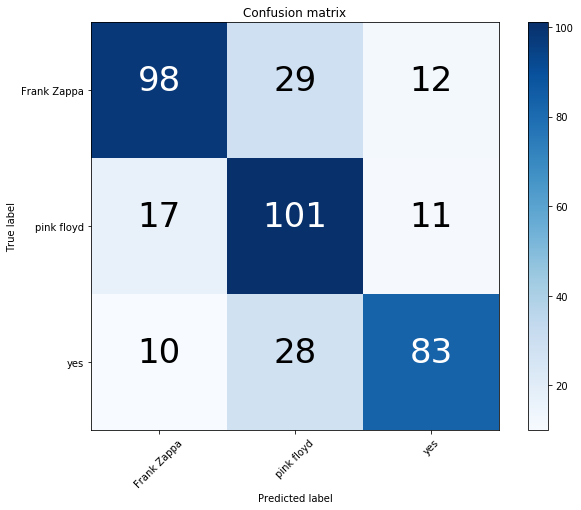

In [106]:
authors = pipeline.classes_
print(accuracy_score(y_train, prediction))
plot_confusion_matrix(y_train, prediction, classes=authors)

[0.72519084 0.66666667 0.65116279]


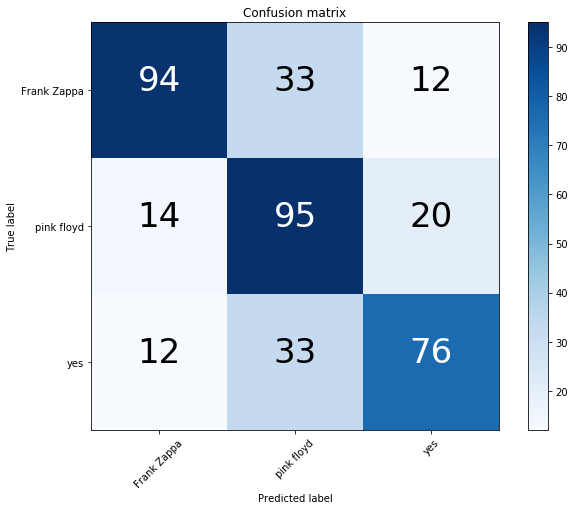

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', RandomForestClassifier())
])
print(cross_val_score(pipeline, X_train, y_train, cv=3, n_jobs=3))
prediction = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=3)
plot_confusion_matrix(y_train, prediction, classes=authors)

[0.77099237 0.7751938  0.75968992]


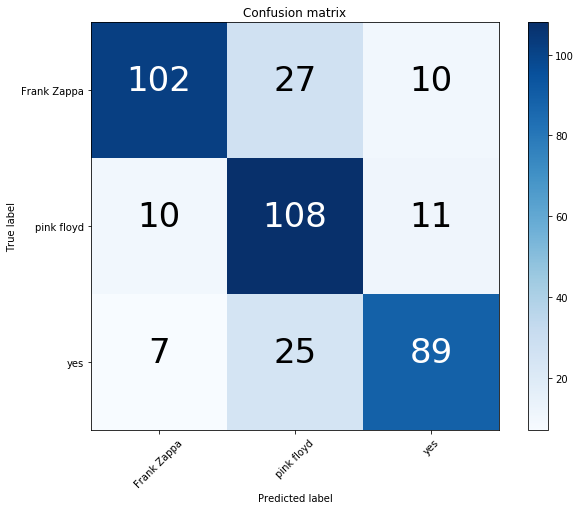

In [108]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('features', CountVectorizer()),
    ('clf', LogisticRegression())
])

print(cross_val_score(pipeline, X_train, y_train, cv=3, n_jobs=3))
prediction = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=3)
plot_confusion_matrix(y_train, prediction, classes=authors)


#### Term-frequency inverse document-frequency
    - Interesting Enough I was worried why the model is mistakingly predicting Pink Floyd so much, but now using Tfidf, it could turn out that the basic Count Vectorizer is not explaining the data good enough.
    - The Count Vectorizer's word equality could be a problem for our data and we could start using the Tfidf more frequently

[0.86259542 0.71317829 0.79069767]


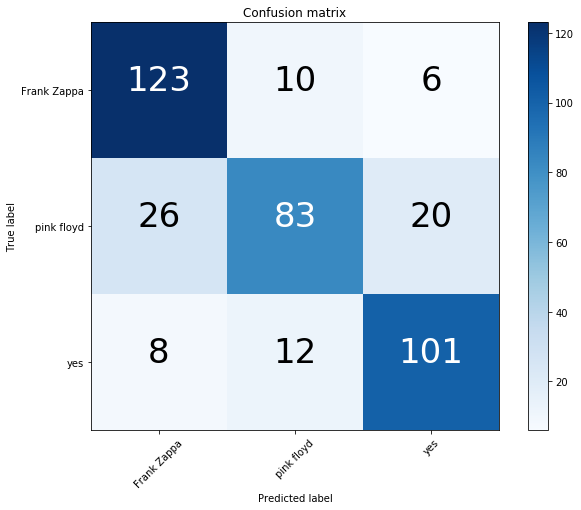

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

pipeline = Pipeline([
    ('features', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

print(cross_val_score(pipeline, X_train, y_train, cv=3, n_jobs=3))
prediction = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=3)
plot_confusion_matrix(y_train, prediction, classes=authors)


#### Now we'll check in what cases model is failing

In [110]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('features', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [111]:
print(pipeline.score(X_train, y_train))
print(pipeline.score(X_test, y_test))

0.9588688946015425
0.8497409326424871


#### We get a good score but it might be irrelevant, as our classes are not equaly distributed

In [112]:
predictions = pipeline.predict(X_train)
missed_count = 0
for count, el in enumerate(predictions):
    if(df.iloc[count]['band'] != el):
        missed_count +=1
print("missed_count", missed_count)
print("total count", count)

missed_count 250
total count 388


In [113]:
predictions = pipeline.predict(X_train)
for count, el in enumerate(predictions):
    if(df.iloc[count]['band'] != el):
        print("predicted: {} but is: {}".format(el, df.iloc[count]['band']))
        print(df.iloc[count]['lyrics'])
        print("^"*30)

predicted: Frank Zappa but is: yes
A beacon is shining 
'Cross the cosmos, it's guiding 
Igniting the pathway for us 
Through the winter of our lives 
A faithful polestar arises 
Within every heart 
The courage to advance 
Passed our plight at this stage is 
The light of the ages When troubles lay me low 
As fierce winds blow 
Turn my gaze beyond 
To ride the inbound stream 
There grace and mercy shine 
And fear is a dream 
Sorrow's a dream When darkness holds me down 
And trials abound 
Lift my gaze within 
I'll heed the primal sound 
Exposing the grand scheme 
I can see it's a dream 
Sorrow's a dream And a beacon is shining 
'Cross the cosmos, it's guiding 
Igniting the pathway for us 
Through the winter of our lives 
A faithful polestar arises 
Within every heart 
The courage to advance 
Passed our plight at this stage is 
The light of the ages I will follow the all knowing 
Ever glowing light 
Through my soul's long dark night When darkness holds me down 
And trials abound 
Lift my

predicted: Frank Zappa but is: yes
Anderson/Howe/Squire/White 
September 11, 2001 Answers never clear again 
This turning of the page 
This turn look away There I took a left turning 
Before I came of age 
I agreed to let it out 
I agreed to let it go 
I agreed to turn around 
I agreed to turn my face away Danger is the most important 
Fear you'll ever know 
The transporting of refugees 
The silent night is cold And all the time 
We looked around 
As we were never told But we agreed to let it out 
We agreed to let it go 
We agreed to turn our backs 
We agreed to turn our face away, away Thousands to the million 
Sisters, grandmothers and more 
It's not the feast we throw away 
It's the way we close the door Their silence deafens every sound 
We try just to ignore 
To waste their future freedom 
We'll regret forever more I believe in 
I believe in 
These are the days that we will talk about 
I believe in 
I believe in 
One understanding what is real If we are one 
Then we are refugees 


Vinnie Colaiuta drums] 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
predicted: pink floyd but is: yes
I've seen all good people turn their heads each day 
So satisfied I'm on my way 
I've seen all good people turn their heads each day 
So satisfied I'm on my way Take a straight and stronger course 
to the corner of your life 
Make the white queen run so fast 
she hasn't got time to make you a wife 'Cause it's time, it's time in time with your time 
and its news is captured 
for the queen to use! 
Move me on to any black square 
Use me anytime you want 
Just remember that the goal 
Is for us all to capture all we want 
(Move me on to any black square) Don't surround yourself with yourself 
Move on back two squares 
Send an instant karma to me 
Initial it with loving care 
(Don't surround yourself) 'Cause it's time, it's time in time with your time 
and its news is captured 
for the queen to use! Diddit diddit diddit diddit diddit diddit diddit didda 
Diddit diddit diddit diddit diddit diddit diddit 

predicted: pink floyd but is: Frank Zappa
Frank Zappa (lead guitar, vocals) 
Ike Willis (rhythm guitar, vocals) 
Ray White (rhythm guitar, vocals) 
Bob Harris (boy soprano, trumpet) 
Steve Vai (guitar) 
Tommy Mars (keyboards) 
Arthur Barrow (bass) 
Ed Mann (percussion) 
David Ocker (clarinet, bass clarinet) 
Motorhead Sherwood (tenor saxophone, vocals) 
Denny Walley (slide guitar, vocals) 
David Logeman (drums) 
Craig Steward (harmonica) 
Jimmy Carl Black (vocals) 
Ahmet Zappa (vocals) 
Moon Zappa (vocals) Registered mail... special delivery 
OH NO 
You're gonna hafta sign fer this, buddy 
OH NO 
I know you're in there, ya little sumbitch 
OH NO 
Goddam little communist... 
(weep, weep, weep) I don't wanna get drafted 
I don't wanna go 
I don't wanna get drafted 
PHOOEY! I don't wanna get drafted 
I don't wanna go 
I don't wanna get drafted 
NO-OH-WOH-OH-WOH... Roller skates 'n disco 
It's a lot of fun 
I'm too young 'n stupid 
To operate a gun LaCelia Jackson! Come on down! 
I DON'T W

predicted: pink floyd but is: yes
I'll be the round about, the words will make you out 'n' out 
I spend the day your way 
Call it morning, driving through the sound 
And in and out the valley The music dance and sing, they make the children really ring 
I spend the day your way 
Call it morning, driving through the sound 
And in and out the valley In and around the lake, mountains come out of the sky 
And they stand there 
One mile over, we'll be there and we'll see you 
Ten true summers we'll be there and laughing too 
Twenty four before, my love, you'll see, I'll be there with you I will remember you 
Your silhouette will charge the view of distance atmosphere 
Call it morning, driving through the sound 
And even in the valley In and around the lake, mountains come out of the sky 
And they stand there 
One mile over, we'll be there and we'll see you 
Ten true summers we'll be there and laughing too 
Twenty four before, my love, you'll see, I'll be there with you Along the drifting cl

predicted: Frank Zappa but is: yes
(Trevor Rabin/Jon Anderson) Where will you be when you're not here 
How many lives in this earth time 
You are my soul and this you are 
Two souls intertwined that's what we are We can we walk hand in hand 
All the life 
Be the one everything to me 
You I am dreaming 
We have lived and known before I feel it Where will you lie When will I know 
When you are gone 
Where I be and I will miss you 
We are this love in this life 
Two souls intertwined like once before 
See this meeting, hand in hand 
Every life 
Be the one everything to me 
You are my feeling No need to fear this love of life 
We are the truth of every earth life 
No need to fear this life at all 
We are the sun and everlasting life 
Where will you be hearing this song 
How many lives in this earth time 
You are my soul and this you are 
You are my soul and this you are Where will you be 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
predicted: Frank Zappa but is: pink floyd
You gotta be crazy, you gotta

predicted: Frank Zappa but is: yes
We go sailing down the calming streams 
Drifting endlessly by the bridge 
To be over, we will see, to be over Do not suffer through the game of chance that plays 
Always doors to lock away your dreams 
Think it over, time will heal your fear, think it over 
Balance the thoughts that release within you Childlike soul dreamer 
One journey, one to seek and see in every light 
Do open true pathways away Carrying closer 
Go gently, holding doors will open every way 
You wander true pathways away After all your soul will still surrender 
After all don't doubt your part 
Be ready to be loved 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
predicted: pink floyd but is: yes
I sound 
(anderson / howe / wakeman / bruford) 
Instrumental Ii second attention 
(anderson / howe / wakeman / bruford) 
Be gone you ever piercing 
Power play machine 
Cutting our musical solidarity 
For those who would break the windows 
Of our true reflections 
And perceptions of the world 
'for I am out

In [114]:
missed = 0
for lyric, band in zip(X_train, y_train):
    prediction_el = pipeline.predict([lyric])[0]
    if( prediction_el != band):
        print(band)
        print(lyric)
        print(prediction_el)
        print('^'*50)
        missed +=1
print(missed)

yes
[Instrumental] 
pink floyd
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Frank Zappa
(Instrumental) 
pink floyd
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
yes
[Instrumental] 
pink floyd
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Frank Zappa
INSTRUMENTAL 
pink floyd
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Frank Zappa
INSTRUMENTAL 
pink floyd
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
yes
When I'm walking beside her, 
People tell me I'm lucky 
Yes I know I'm a lucky guy 
I remember the first time 
I was lonely without her 
Can't stop thinking about her now 
Every little thing she does 
She does for me 
And you know the things she does 
She does for me When I'm with her I'm happy 
Just to know that she loves me 
Yes I know that she loves me now 
There is one thing I'm sure of 
I will love her forever 
'cause I know love will never die 
Every little thing she does 
She does for me 
And you know the things she does 
She does for me Every little th

In [115]:
missed_count = 0
for index, row in df.iterrows():
    prediction_el = pipeline.predict([row["lyrics"]])[0]
    # print(row["lyrics"])
    if(prediction_el != row['band']):
        missed_count += 1
        print(row['lyrics'])
# for lyric, band in zip(X_train, y_train):
#     prediction_el = pipeline.predict([lyric])[0]
#     if( prediction_el != band):
#         print(band)
#         print(lyric)
#         print(prediction_el)
#         print('^'*50)
#         missed +=1
# print(missed)
print(missed_count)

Scream thy last scream old woman with a casket 
Blam blam your pointers point your pointers 
Waddle with apples to crunchy Mrs. Stores 
She'll be scrubbing bubbles on all fours 
Scream thy last scream old woman with a casket Fling your arms madly old lady with a daughter 
Flack chap chau fauses, mouses, houses 
Flittin' and hittin' and fittin' quack quack 
Watching the teley till all hours big time 
Fling your arms madly old lady with a daughter (Oh, sock it to me...) Scream thy last scream old woman with a casket 
Blam blam your pointers point your pointers 
Waddle with apples to crunchy Mrs. Stores 
She'll be scrubbing bubbles on all fours 
Scream thy last scream old woman with a casket 
[Instrumental] 
I was standing by the Nile 
When I saw the lady smile 
I would take her for a while 
For a while Like tears wept like a child 
How her golden hair was blowing wild 
Then she spread her wings to fly 
For to fly Soaring high above the breezes 
Going always where she pleases 
She will ma

INSTRUMENTAL 
Instrumental 
INSTRUMENTAL 
Leave, when I ask you to leave Lucy 
Please, far away from me Lucy 
Oh, go little girl 
Seen, is oh so broken up about you, Lucy 
Mean, treat me and done me harm, Lucy 
Been in love with you and your charms, Lucy 
Oh, go little girl 
I'm in love with you 
Lucy You got my heart 
You got my heart, oh no! 
You tear me apart 
You just won't let me go 
You hold on so tight, so tight I just can't breathe 
Now Lucy leave 
Lucy Leave, when I ask you to leave little girl 
Please, far away from me little girl 
Yeah! go little girl 
Seen is oh so broken up about you Lucy 
Yeah! Go 
We can fly (we can fly) 
We can fly (we can fly) And we can fly from here 
Into the sky that's clearing 
Look back we'll dry the tears 
For those once held so nearly And we can fly from here (we can fly) 
And we can fly from here (we can fly) 
And we can fly from here (we can fly) 
And we can fly from here (we can fly) 
And we can fly from here On the understanding that we can 

[Instrumental] 
"...announced plans to build a nuclear fallout shelter at Peterborough in Cambridgeshire..." "...three high court judges have cleared the way..." "...It was announced today, that the replacement for the Atlantic Conveyor the container ship lost in the Falklands conflict wouldbe built in Japan, a spokesman for..." "...moving in. They say the third world countries, like Bolivia, which produce the drug are suffering from rising violence..." Tell me true, tell me why, was Jesus crucified 
Is it for this that Daddy died? 
Was it for you? Was it me? 
Did I watch too much T.V.? 
Is that a hint of accusation in your eyes? 
If it wasn't for the nips 
Being so good at building ships 
The yards would still be open on the clyde. 
And it can't be much fun for them 
Beneath the rising sun 
With all their kids committing suicide. 
What have we done, Maggie what have we done? 
What have we done to England? 
Should we shout, should we scream 
"What happened to the post war dream?" 
Oh M

#### Lets try with double and triple words

ngram_range=(1,2)

[0.80152672 0.7751938  0.7751938 ]


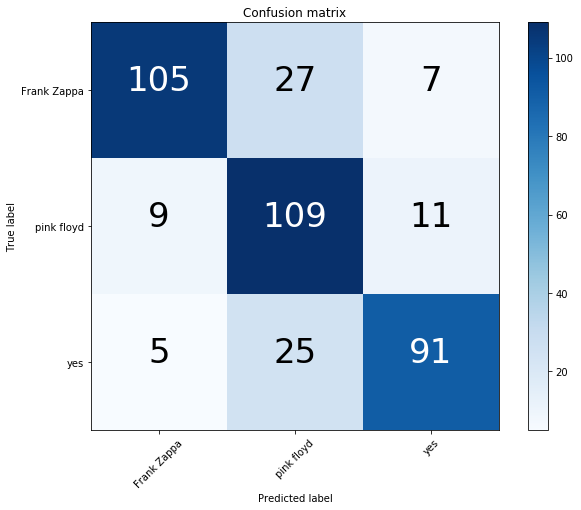

In [116]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('features', CountVectorizer(ngram_range=(1,2))),
    ('clf', LogisticRegression())
])

print(cross_val_score(pipeline, X_train, y_train, cv=3, n_jobs=3))
prediction = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=3)
plot_confusion_matrix(y_train, prediction, classes=authors)

#### Turns out the single bag of words data gives better results but for the experiment, lets try with 3:

[0.78625954 0.75968992 0.79069767]


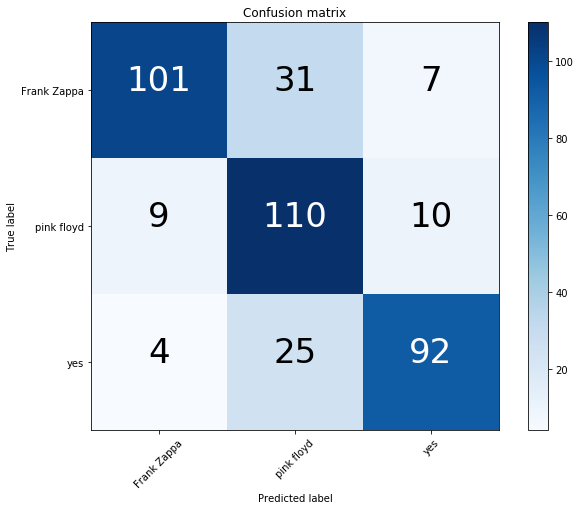

In [117]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('features', CountVectorizer(ngram_range=(1,3))),
    ('clf', LogisticRegression())
])

print(cross_val_score(pipeline, X_train, y_train, cv=3, n_jobs=3))
prediction = cross_val_predict(pipeline, X_train, y_train, cv=3, n_jobs=3)
plot_confusion_matrix(y_train, prediction, classes=authors)

### The model does not get much more better, I think we should stick with our single word bag of word vectorizer for 2 reasons:
    - Simpler model;
    - less chance for overfitting.

#### Dependencies:
Use the following command in case of error:

```nltk.download('stopwords')```

In [118]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

### We will try to generate new features

In [119]:
explore = pd.DataFrame({"lyrics": X_train.copy()})

# бр. думи в текста
explore['words'] = explore.lyrics.apply(lambda s: len(str(s).split()))

# бр. уникални думи
explore['unique_words'] = explore.lyrics.apply(lambda s: len(set(str(s).split())))

# бр. символи
explore['symbols'] = explore.lyrics.str.len()

# бр. уникални символи
explore['unique_symbols'] = explore.lyrics.apply(lambda s: len(set(str(s))))

# avg word len
explore['average_word_lenght'] = explore.lyrics.apply(lambda s: np.mean([len(w) for w in str(s).split()]))

In [147]:
explore_test = pd.DataFrame({"lyrics": X_test.copy()})

# бр. думи в текста
explore_test['words'] = explore_test.lyrics.apply(lambda s: len(str(s).split()))

# бр. уникални думи
explore_test['unique_words'] = explore_test.lyrics.apply(lambda s: len(set(str(s).split())))

# бр. символи
explore_test['symbols'] = explore_test.lyrics.str.len()

# бр. уникални символи
explore_test['unique_symbols'] = explore_test.lyrics.apply(lambda s: len(set(str(s))))

# avg word len
explore_test['average_word_lenght'] = explore_test.lyrics.apply(lambda s: np.mean([len(w) for w in str(s).split()]))

In [120]:
explore.head()

lyrics  words  unique_words  \
278  Emily tries but misunderstands \nShe's often i...    114            58   
261  Welcome my son \nWelcome to the machine \nWher...    106            66   
301  Mark Volman (lead vocals) \nHoward Kaylan (lea...     66            59   
234  Performed by: Baby Ray & The Ferns -(You dirty...    106            64   
424  If you didn't care what happened to me \nAnd I...     45            35   

     symbols  unique_symbols  average_word_lenght  
278      620              35             4.298246  
261      559              36             4.132075  
301      403              47             4.969697  
234      630              48             4.688679  
424      240              28             4.222222

          band                                             lyrics  words  \
0  Frank Zappa  It was the blackest night \nThere was no moon ...    777   
1  Frank Zappa  \nA boring old garage in a residential area wi...    777   
2  Frank Zappa  I might be movin' to Montana soon \nJust to ra...    420   
3  Frank Zappa  Dreamed I was an eskimo \nFrozen wind began to...    127   
4  Frank Zappa  Frank Zappa (guitar, lead vocals) \nRay White ...    176   

   unique_words  symbols  unique_symbols  
0           372     4078              54  
1           405     4104              59  
2           173     2365              54  
3            69      647              37  
4            97     1090              45  
  band                                             lyrics  words  \
0  yes  I The Solid Time Of Change A seasoned witch co...    731   
1  yes  Hold your head up high you know you've \nCome ...    438   
2  yes  Yes \nClose To The Edge I. The Solid Time Of C...   1434   
3  yes  Siste

/home/martin/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([184.,  16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([89., 69., 10.,  1.,  0.,  0.,  1.,  1.,  0.,  0.]),
  array([105.,  65.,  22.,  13.,   5.,   0.,   0.,   0.,   0.,   1.])],
 array([1.0000e+00, 2.3890e+02, 4.7680e+02, 7.1470e+02, 9.5260e+02,
        1.1905e+03, 1.4284e+03, 1.6663e+03, 1.9042e+03, 2.1421e+03,
        2.3800e+03]),
 <a list of 3 Lists of Patches objects>)

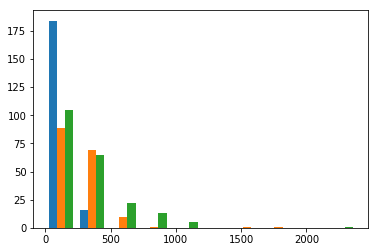

In [121]:
explore_pink = pink.copy()
explore_yes = yes.copy()
explore_zappa = zappa.copy()

# бр. думи в текста
explore_pink['words'] = explore_pink.lyrics.apply(lambda s: len(str(s).split()))
explore_zappa['words'] = explore_zappa.lyrics.apply(lambda s: len(str(s).split()))
explore_yes['words'] = explore_yes.lyrics.apply(lambda s: len(str(s).split()))

# бр. уникални думи
explore_pink['unique_words'] = explore_pink.lyrics.apply(lambda s: len(set(str(s).split())))
explore_zappa['unique_words'] = explore_zappa.lyrics.apply(lambda s: len(set(str(s).split())))
explore_yes['unique_words'] = explore_yes.lyrics.apply(lambda s: len(set(str(s).split())))

# бр. символи
explore_pink['symbols'] = explore_pink.lyrics.str.len()
explore_zappa['symbols'] = explore_zappa.lyrics.str.len()
explore_yes['symbols'] = explore_yes.lyrics.str.len()

# бр. уникални символи
explore_pink['unique_symbols'] = explore_pink.lyrics.apply(lambda s: len(set(str(s))))
explore_zappa['unique_symbols'] = explore_zappa.lyrics.apply(lambda s: len(set(str(s))))
explore_yes['unique_symbols'] = explore_yes.lyrics.apply(lambda s: len(set(str(s))))

# show data:
explore_pink.head()
print(explore_zappa.head())
print(explore_yes.head())
plt.hist([explore_pink.words, explore_yes.words, explore_zappa.words,])

#### Lets see which groups have what unique words

#### Pink floyd hist:

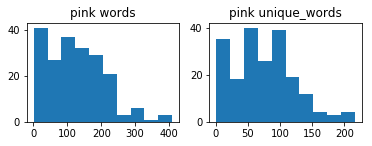

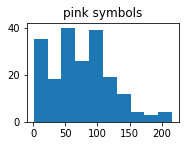

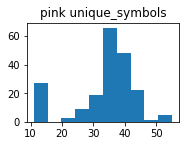

In [122]:
plt.figure(1)
plt.subplot(221)
plt.title("pink words")
plt.hist(explore_pink.words)

plt.subplot(222)
plt.title("pink unique_words")
plt.hist(explore_pink.unique_words,)
plt.show()

plt.subplot(223)
plt.title("pink symbols")
plt.hist(explore_pink.unique_words,)
plt.show()

plt.subplot(224)
plt.title("pink unique_symbols")
plt.hist(explore_pink.unique_symbols,)
plt.show()

#### Yes data

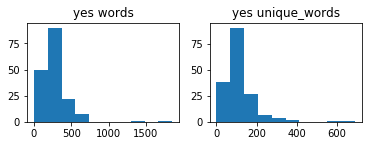

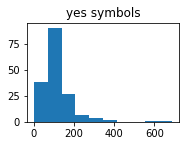

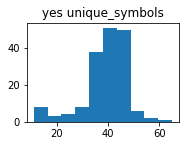

In [123]:
plt.figure(1)
plt.subplot(221)
plt.title("yes words")
plt.hist(explore_yes.words)

plt.subplot(222)
plt.title("yes unique_words")
plt.hist(explore_yes.unique_words,)
plt.show()

plt.subplot(223)
plt.title("yes symbols")
plt.hist(explore_yes.unique_words,)
plt.show()

plt.subplot(224)
plt.title("yes unique_symbols")
plt.hist(explore_yes.unique_symbols,)
plt.show()


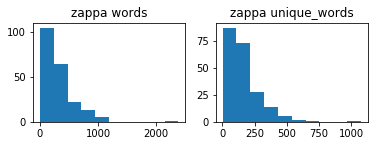

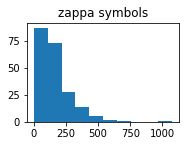

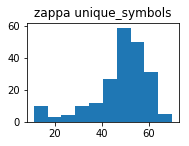

In [124]:
plt.figure(1)
plt.subplot(221)
plt.title("zappa words")
plt.hist(explore_zappa.words)

plt.subplot(222)
plt.title("zappa unique_words")
plt.hist(explore_zappa.unique_words,)
plt.show()

plt.subplot(223)
plt.title("zappa symbols")
plt.hist(explore_zappa.unique_words,)
plt.show()

plt.subplot(224)
plt.title("zappa unique_symbols")
plt.hist(explore_zappa.unique_symbols,)
plt.show()

/home/martin/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


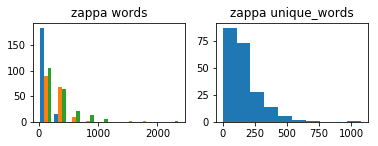

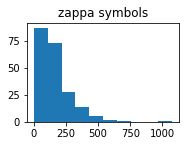

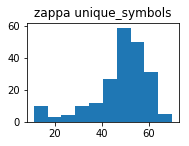

In [125]:
plt.figure(1)
plt.subplot(221)
plt.title("zappa words")
plt.hist([explore_pink.words,explore_yes.words,explore_zappa.words])

plt.subplot(222)
plt.title("zappa unique_words")
plt.hist(explore_zappa.unique_words,)
plt.show()

plt.subplot(223)
plt.title("zappa symbols")
plt.hist(explore_zappa.unique_words,)
plt.show()

plt.subplot(224)
plt.title("zappa unique_symbols")
plt.hist(explore_zappa.unique_symbols,)
plt.show()


#### Yes histogram
    - From this plot we could make a stats test to check if these entries which are bigger than 1250 are outliers
    - To do this we would first need to have a model

(array([50., 90., 22.,  7.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([1.000e+00, 1.860e+02, 3.710e+02, 5.560e+02, 7.410e+02, 9.260e+02,
        1.111e+03, 1.296e+03, 1.481e+03, 1.666e+03, 1.851e+03]),
 <a list of 10 Patch objects>)

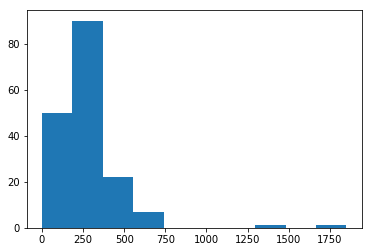

In [126]:
plt.hist(explore_yes.words)

#### Lets try a simple Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression as lr

# logistic model
explore_log_reg_model = lr()

# fixing train set
explore_reshaped =explore.drop(["lyrics"], axis=1)
y_train_reshaped = y_train.reshape(389,1)

#fixing test set
explore_test_reshaped = explore_test.drop(["lyrics"], axis=1)
y_test_reshaped = y_test

# fit
explore_log_reg_model.fit(explore_reshaped, y_train_reshaped)

# result
print(explore_log_reg_model.score(explore_reshaped, y_train_reshaped))
print(explore_log_reg_model.score(explore_test_reshaped, y_test_reshaped))

0.6375321336760925
0.6735751295336787


/home/martin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/martin/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
explore[explore["words"] > 1000]

lyrics  words  unique_words  \
393  Mark Volman (lead vocals) \nHoward Kaylan (lea...   2380          1076   
97   Frank Zappa (guitar, dialog) \nMark Volman (le...   1016           570   
532  Lowell George (dialog) \nJimmy Carl Black (dia...   1088           513   
463  Frank Zappa (guitar, synclavier) \nSteve Vai (...   1160           707   

     symbols  unique_symbols  average_word_lenght  
393    13368              65             4.563025  
97      5770              61             4.598425  
532     5665              63             4.066176  
463     6922              66             4.934483

In [140]:
outlier_indexes = [329, 457, 129, 100]
explore_trimed = explore_reshaped.drop(outlier_indexes,axis=0)
y_train_trimed = y_train.drop(outlier_indexes)

In [151]:
from sklearn.linear_model import LogisticRegression as lr

# model
explore_log_reg_model = lr()

# train set
y_train_reshaped = y_train_trimed.reshape(385,1)

#fixing test set
explore_test_reshaped = explore_test.drop(["lyrics"], axis=1)
y_test_reshaped = y_test

# train:
explore_log_reg_model.fit(explore_trimed, y_train_reshaped)

# result
print(explore_log_reg_model.score(explore_trimed, y_train_reshaped))
print(explore_log_reg_model.score(explore_test_reshaped, y_test_reshaped))


0.6415584415584416
0.6683937823834197


/home/martin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/home/martin/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Result:
    - Interesting Enough we got better score on the train set but worser for the test set.
    - This experiment does not prove the significance of the selected rows

#### Future ideas:
    - To prove the significance of the selected rows and maybe find outliers, we could try using Jack Knife

#### F-statistic:
$$\frac{\frac{SSE_{\omega}-SSE_{\Omega}}{q-p}}{\frac{SSE_\Omega}{n-q}}\sim F(q-p,n-q)$$

    - Another technique we could use is to check whether some of the features are statistically significant using this F-test

#### Lets try some deep learning:

In [ ]:
explore.drop(["lyrics"], axis=1).shape

In [153]:
# explore.drop(["lyrics"], axis=1)

#vecotrizing text
tf_vectorizer = CountVectorizer()

#getting the TF matrix
tf = tf_vectorizer.fit_transform(explore["lyrics"])

keras_cv_df = pd.DataFrame(tf.A)
keras_cv_df.shape

(389, 7376)

In [204]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [156]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)

#### Defining baseline model

In [170]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=7376, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### Setting an instance for the baseline model

In [171]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [172]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [173]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [174]:
results = cross_val_score(estimator, keras_cv_df, dummy_y_train, cv=kfold)

Baseline: 77.10% (6.83%)


In [175]:
print("Baseline: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 77.10% std: (6.83%)


#### results:
    - Baseline: 77.10% std: (6.83%)
    - 30 minutes training
    - From Chebyshev's inequality we know that for any random distribution the mean +/- a standard deviation gives use 75% coverage. So does that mean that in our case if the baseline is an equally distributed random variable, it would give a result in range [70-84]% ?

#### Further analysis:
    - Considering our 7000+ features we should consider CNNs
    - We could try with another baseline model but this time with the other features, or maybe combined
    - maybe try to make a model with more epochs, and put it on to crunch numbers for a day

In [206]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=5, verbose=0)

In [207]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [208]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [209]:
results = cross_val_score(estimator, keras_cv_df, dummy_y_train, cv=kfold)

In [210]:
print("Baseline: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 75.84% std: (5.39%)


#### Results:
    - Baseline: 75.84% std: (5.39%)

#### Lets try some deep learning:

In [ ]:
explore.drop(["lyrics"], axis=1).shape

In [153]:
# explore.drop(["lyrics"], axis=1)

#vecotrizing text
tf_vectorizer = CountVectorizer()

#getting the TF matrix
tf = tf_vectorizer.fit_transform(explore["lyrics"])

keras_cv_df = pd.DataFrame(tf.A)
keras_cv_df.shape

(389, 7376)

In [204]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [156]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)

#### Defining baseline model

In [170]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=7376, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### Setting an instance for the baseline model

In [171]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [172]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [173]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [174]:
results = cross_val_score(estimator, keras_cv_df, dummy_y_train, cv=kfold)

Baseline: 77.10% (6.83%)


In [175]:
print("Baseline: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 77.10% std: (6.83%)


#### results:
    - Baseline: 77.10% std: (6.83%)
    - 30 minutes training
    - From Chebyshev's inequality we know that for any random distribution the mean +/- a standard deviation gives use 75% coverage. So does that mean that in our case if the baseline is an equally distributed random variable, it would give a result in range [70-84]% ?

#### Further analysis:
    - Considering our 7000+ features we should consider CNNs
    - We could try with another baseline model but this time with the other features, or maybe combined
    - maybe try to make a model with more epochs, and put it on to crunch numbers for a day

In [206]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=5, verbose=0)

In [207]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [208]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [209]:
results = cross_val_score(estimator, keras_cv_df, dummy_y_train, cv=kfold)

In [210]:
print("Baseline: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 75.84% std: (5.39%)


#### Results:
    - Baseline: 75.84% std: (5.39%)

In [212]:
# explore.drop(["lyrics"], axis=1)

#vecotrizing text
tf_vectorizer = TfidfVectorizer()

#getting the TF matrix
tf = tf_vectorizer.fit_transform(explore["lyrics"])

keras_cv_df = pd.DataFrame(tf.A)
keras_cv_df.shape

(389, 7376)

In [213]:
estimator_tf = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [214]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [215]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [216]:
results_tf = cross_val_score(estimator_tf, keras_cv_df, dummy_y_train, cv=kfold)

In [217]:
print("Baseline: %.2f%% std: (%.2f%%)" % (results_tf.mean()*100, results_tf.std()*100))

Baseline: 84.57% std: (5.87%)


#### Convolutional model:

In [178]:
keras_cv_df_features_len = keras_cv_df.shape[1]

In [191]:
keras_cv_df.shape

(389, 7376)

In [199]:
# define baseline model
def CNN_model():
    # create model
    model = Sequential()
    #model.add(Dense(8, input_dim=7376, activation='relu'))
    model.add(Conv1D(100, 10, activation='relu', input_shape=(389, 7376)))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [200]:
estimator_CNN = KerasClassifier(build_fn=CNN_model, epochs=50, batch_size=5, verbose=0)

In [201]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [202]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [205]:
results = cross_val_score(estimator_CNN, keras_cv_df, dummy_y_train, cv=kfold)

ValueError: Error when checking input: expected conv1d_4_input to have 3 dimensions, but got array with shape (350, 7376)

In [175]:
print("Baseline: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 77.10% std: (6.83%)
